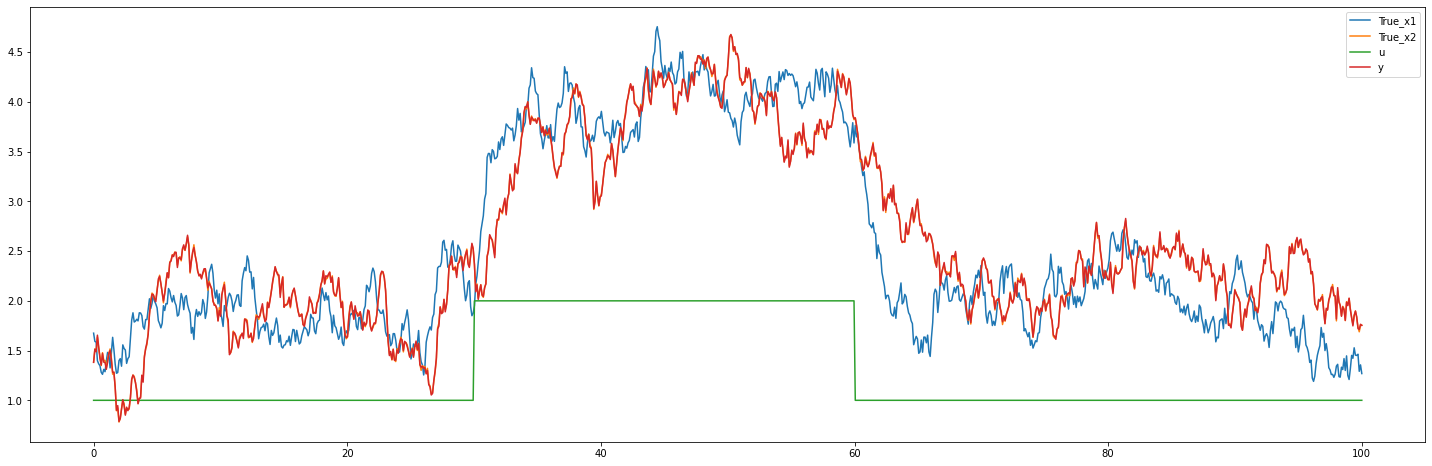

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

true_x1 = pd.read_csv('True_state_x1_linear_case.txt',sep=" ", header=0)['True']
true_x2 = pd.read_csv('True_state_x2_linear_case.txt',sep=" ", header=0)['True']
command = pd.read_csv('Input_linear_case.txt',sep=" ", header=0)['input']
mes = pd.read_csv('Measured_output_linear_case.txt',sep=" ", header=0)['output']

time = np.linspace(0,100,1000)
noise = np.random.normal(0,0.0125) # faut-il ajouter du noise à y ?

plt.figure(figsize=(25,8))
plt.plot(time,true_x1, label="True_x1")
plt.plot(time,true_x2, label="True_x2")
plt.plot(time,command, label="u")
plt.plot(time,mes, label="y")
plt.legend(loc="upper right")
plt.show()


In [2]:
dt=0.1 #seconds
Nsteps = 1000


# Matrices

# Lien step en fonction du step d'avant
A = np.array([[0.9512, 0],   
              [0.0476, 0.9512]])  

# Lien step en fct de la commande
B = np.array([[0.0975],
              [0.0024]])

# Lien mesure en fct de l'état
C = np.array([0, 1])

# Covariance de l'état initial
P0 = np.array([[1, 0],
               [0, 1]])

# Process noise (=W)
mean = (0, 0)
Q = np.array([[0.009506, 0.000234],   
              [0.000234, 0.009506]]) 



# Measurement noise (1x1)
R = 0.0125

#number of steps 

N = 1000


# Initial states
init =  np.empty((N, 2 , 1), dtype=float)
for i in range(N - 1):
    x1_0 = 5 + np.random.normal(0, 1)
    x2_0 = 5 + np.random.normal(0, 1)
    init[i , :, :] = np.array([[x1_0],
                [x2_0]])



# Initial states




print(init)




[[[5.26243502]
  [4.16823205]]

 [[5.19220552]
  [5.18408417]]

 [[4.82927247]
  [6.31617091]]

 ...

 [[6.17355624]
  [4.57669295]]

 [[4.48223569]
  [5.70829269]]

 [[0.        ]
  [0.        ]]]


In [3]:
def EnKalman_predictor(A, B, Q, init, P0, C, R, Measurements, command, Nsteps, N):
    
    # Output : 
    # - Predicted_states, a Nsteps x 2 array containing the states at all time indexes
    
    K = np.empty((Nsteps, 2, 1), dtype=float)
    P = np.empty((Nsteps, 2, 2), dtype=float)
    Ptilde = np.empty((Nsteps, 2, 2), dtype=float)
    mu = np.empty((Nsteps, N, 2, 1), dtype=float)
    
    P[0, :, :] = P0
    mu[0, :, :] = init; 
    print(mu[0, 0, :, :])
    for k in range(Nsteps-1):
        
        
        K[k, :, :] = (P[k, :, :] @ C.T) @ C.T * 1/(C @ P[k, :, :] @ C.T + R)
        
        Ptilde[k,: , :] = A @ P[k, : , :] @ A.T + Q 
        
        P[k+1, :, :] =  Ptilde[k , : , :] @ C.T - K[k , : , : ] * C @ Ptilde[ k ,: , :]
        
        for i in range(N):
            mu_tild = A @ mu[k, i , : , :] + B * command[k]  # (2*1)
            mu[k+1, i, : , :] = mu_tild + K[k, : , :] * (Measurements[k] - C @ mu_tild)
      
    return mu

In [4]:
def Moyenne(pred_states, Nsteps):
    
    tab = np.empty((Nsteps, 2, 1), dtype=float)
    for k in range(Nsteps) :
        tab[k, 0 , : ] = pred_states[k, : , 0, :].mean()
        tab[k, 1 , : ] = pred_states[k, : , 1, :].mean()
    
    return(tab)
    

[[5.26243502]
 [4.16823205]]


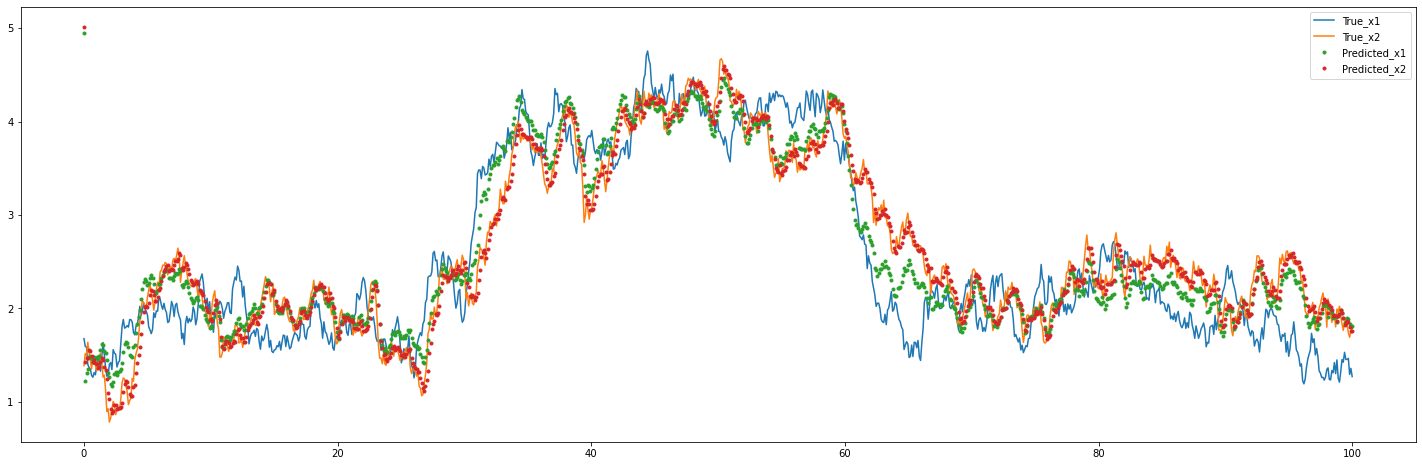

In [5]:
pred_states = EnKalman_predictor(A, B, Q, init, P0, C, R, mes, command, Nsteps, N)

pred_states_moy = Moyenne(pred_states, Nsteps)


plt.figure(figsize=(25,8))
plt.plot(time,true_x1, label="True_x1")
plt.plot(time,true_x2, label="True_x2")
plt.plot(time, pred_states_moy[:,0], ".",label="Predicted_x1")
plt.plot(time, pred_states_moy[:,1], ".",label="Predicted_x2")
plt.legend(loc="upper right")
plt.show()
